# Test work
### I have a DataSet with different parameters.

import librares 

In [31]:
import pandas as pd  # for work with data
import matplotlib.pyplot as plt  # for build plots
from preprocess_test import preprocess

Первое представление о данных 

In [32]:
DataSet = pd.read_csv('data/Mall_Customers.csv')
DataSet.shape # мы увидим информацию о размерности нашего датафрейма 
DataSet.info() # покажет информацию о размерности данных 
DataSet.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 
DataSet.nunique() # количество уникальных значений для каждого столбца 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## Preprocess

In [60]:
"""Функция 'preprocess' не работает, разобраться с учителем """
Male_DataSet = DataSet.loc[DataSet['Genre'] == 'Male']
Female_DataSet = DataSet.loc[DataSet['Genre'] == 'Female']

## Data split

In [61]:
from sklearn.model_selection import train_test_split
train_df, val_test_df = train_test_split(DataSet, train_size=0.6, random_state=0)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=0)

train_predict = pd.DataFrame
val_predict = pd.DataFrame
test_predict = pd.DataFrame
train_predict = train_df['Spending Score (1-100)']
train_df = train_df['CustomerID'] + train_df['Genre'] + train_df['Age'] + train_df['Annual Income (k$)']

val_predict = val_df['Spending Score (1-100)']
val_df = val_df['CustomerID'] + val_df['Genre'] + val_df['Age'] + val_df['Annual Income (k$)']

test_predict = test_df['Spending Score (1-100)']
test_df = test_df['CustomerID'] + test_df['Genre'] + test_df['Age'] + test_df['Annual Income (k$)']




TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Observation

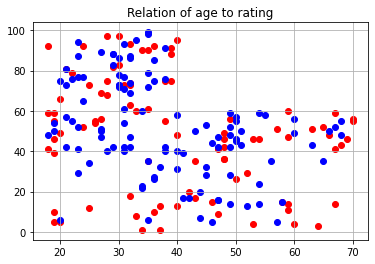

In [35]:
fig = plt.figure()
plt.scatter(Male_DataSet.Age, Male_DataSet['Spending Score (1-100)'], c='red')
plt.scatter(Female_DataSet.Age, Female_DataSet['Spending Score (1-100)'], c='blue')
plt.title('Relation of age to Spending Score')
plt.grid(True)   # линии вспомогательной сетки


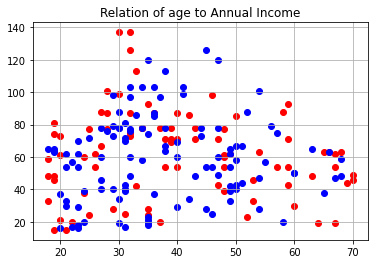

In [46]:
fig = plt.figure()
plt.scatter(Male_DataSet.Age, Male_DataSet['Annual Income (k$)'], c='red')
plt.scatter(Female_DataSet.Age, Female_DataSet['Annual Income (k$)'], c='blue')
plt.title('Relation of age to Annual Income')
plt.grid(True)   # линии вспомогательной сетки


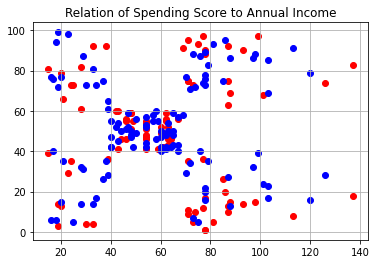

In [50]:
fig = plt.figure()
plt.scatter(Male_DataSet['Annual Income (k$)'], Male_DataSet['Spending Score (1-100)'], c='red', label='Male')  # lable не работает
plt.scatter(Female_DataSet['Annual Income (k$)'], Female_DataSet['Spending Score (1-100)'], c='blue', label='Female')
plt.title('Relation of Spending Score to Annual Income')
plt.grid(True)   # линии вспомогательной сетки

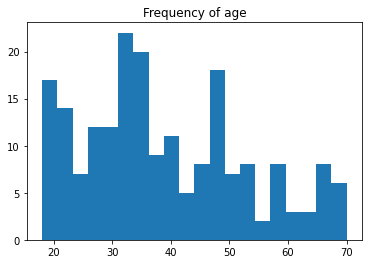

In [44]:
n, bin, patches = plt.hist(DataSet.Age, bins=20)
plt.title('Frequency of age')
plt.show()

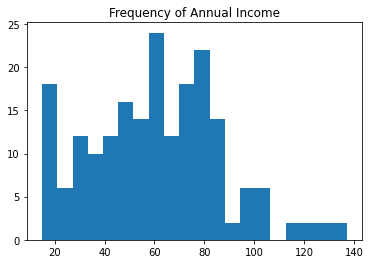

In [45]:
n, bin, patches = plt.hist(DataSet['Annual Income (k$)'], bins=20)
plt.title('Frequency of Annual Income')
plt.show()

(-1.1076326985547413,
 1.1003634618359401,
 -1.1116565525518585,
 1.1276691923410096)

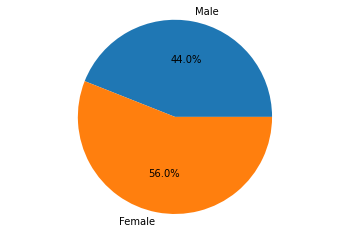

In [55]:
labels = ["Male", "Female"]
fig, ax = plt.subplots()
ax.pie([len(Male_DataSet), len(Female_DataSet)], labels=labels, autopct='%1.1f%%')
ax.axis("equal")

## Обучение модели

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_df, train_predict)
coeff_df = pd.DataFrame(regressor.coef_, train_predict.columns, columns=['Coefficient']) 
coeff_df

ValueError: could not convert string to float: 'Male'